In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/global_power.csv")  # Importing the data

In [3]:
pd.set_option("display.max_columns", None) # To view all coulmns
df.head() # Checking frist five elements

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.tail() # Checking last five elements

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape # We have 908 rows and 25 coulmns

(908, 25)

In [6]:
df.info() # We have some depreciated values in our data set and will take care of them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [7]:
df.nunique() # Checking how many unique properties each column has

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

We only have data for one country, that is India.

In [8]:
df.isnull().sum() # Checking null values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

As we can see some of the columns have no data and some have only one or two data in them. These coulmns will not be hellpful in analysis so I will remove them.

<AxesSubplot:>

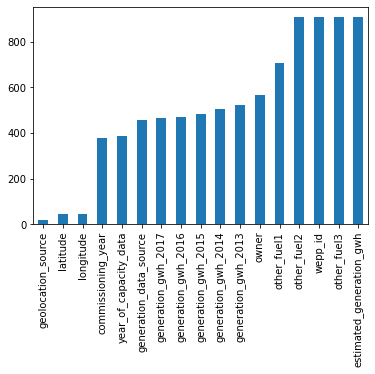

In [9]:
#missing values
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar() # Plotting count of null values

In [10]:
df = df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','country','country_long','gppd_idnr','url'], axis = 1)


 These are depreciated coulms which either have more than 90% missing values or cannot help with out model eg name of plant or country as there is only data of one country.
 So I have decided to remove them

In [11]:
df['primary_fuel'].value_counts() 

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

Most of our data is on Coal, Hydro, Solar and Wind powered energy generation. Gas, Biomass, Oil and Nuclear energy production exists in India, but the plants are few.

Text(0.5, 1.0, 'Locations of powerplants in India based on primary fuel type')

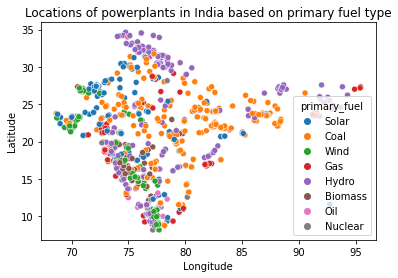

In [12]:
long = df['longitude']
lat = df['latitude']

sns.scatterplot(x = long, y = lat, hue = df['primary_fuel'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of powerplants in India based on primary fuel type')

We can observe that plants are located all over India, most of the Hydro plants are either near the cost of in the mountains, Solar is located where sunlight is abdundant in plains.

## We have to predict the type of fuel and the energy generation capacity, I will be performing some EDA in regards to both

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

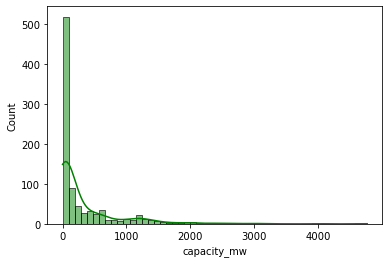

In [13]:
sns.histplot(df['capacity_mw'],bins = 50 , kde = True, color = 'green') # Most of the power plants are of low capacity

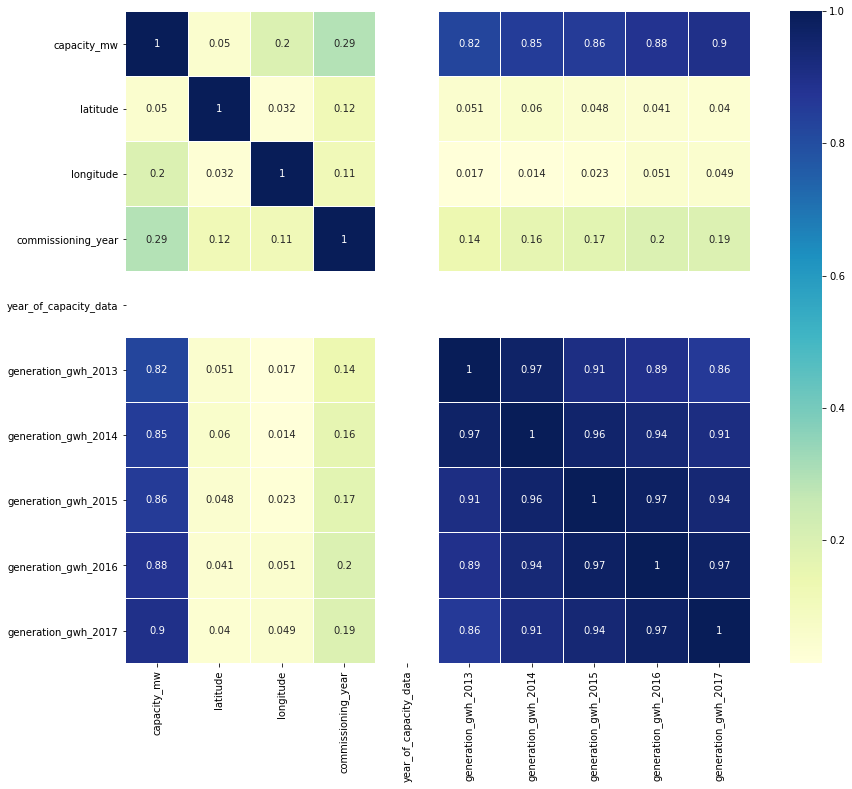

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation

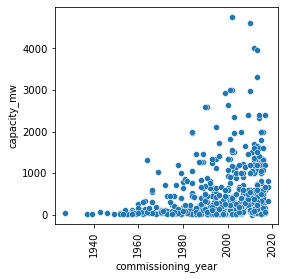

In [15]:
f,ax1 = plt.subplots(figsize = (4,4))
sns.scatterplot(y = df.capacity_mw, x = df['commissioning_year'])
plt.xticks(rotation = 90)
plt.show()

This is a very nice trend which shows progress. we can see the plot of commissioning year in relation with capacity of the plant, we can observe that as India progress the capacity of plants are clearly increasing

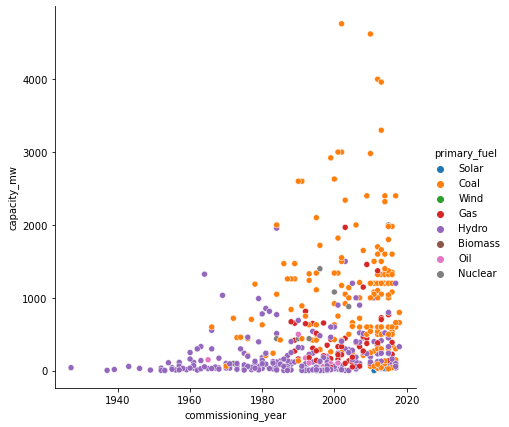

In [16]:
sns.pairplot(data = df, x_vars=['commissioning_year'], y_vars=['capacity_mw'], kind = 'scatter', diag_kind= None, height = 6, hue = 'primary_fuel')

Compairing the same trend, but with plant type. We can see that all of our high capacity ( > 2000 MW) are all coal plants which is not good for the environment.

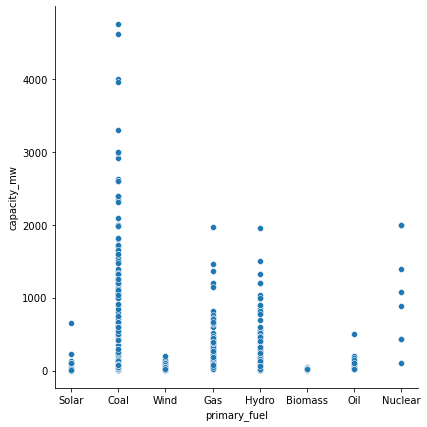

In [17]:
sns.pairplot(data = df, x_vars=['primary_fuel'], y_vars=['capacity_mw'], kind = 'scatter', diag_kind= None, height = 6)

Capacity of plants based on the fuel source. we can observe that biomass, wind and solar are the weakest. Coal dominates the high energy producetion sector. Gas, Hydro, Oil and Nuclear produce between 2000 and 100 MW.

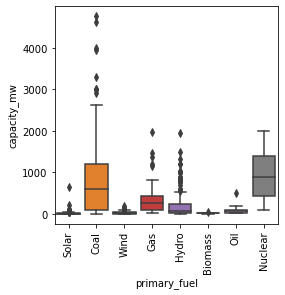

In [18]:
f,ax1 = plt.subplots(figsize = (4,4))
sns.boxplot(x = df.primary_fuel, y = df['capacity_mw'])
plt.xticks(rotation = 90)
plt.show()

In [19]:
df.describe() # Checking basic statistical information of our data

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [20]:
df['average_generation_gwh'] = df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']].mean(axis=1)

I have created a new variable called average_generation_gwh which takes the mean of energy production of a plant overy it's operating period

In [21]:
df['efficiency'] = (df['average_generation_gwh']*1000/ (24*365 *df['capacity_mw']))*100

Defined a new variable called efficiency, the efficiency is defined as the average generation over the years of the plant divided by the total energy the plant could have produced if it was working 24 hours each day everyday, at maximum capacity.


In [22]:
max_efficiency = df[df['efficiency'] > 80]

In [23]:
max_efficiency

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,average_generation_gwh,efficiency
9,AMAR KANTAK,210.0,23.1642,81.6373,Coal,Oil,2008.0,NaN,Central Electricity Authority,WRI,2018.0,2642.3220,1887.904,1643.046,1338.093,1563.457,Central Electricity Authority,1814.96440,98.660818
108,BUDGE BUDGE,750.0,22.4673,88.1400,Coal,Oil,2001.0,NaN,Central Electricity Authority,WRI,2018.0,5493.3700,5371.950,5327.270,4974.380,5563.090,Central Electricity Authority,5346.01200,81.370046
143,CHANDRAPURA,630.0,23.7376,86.1273,Coal,Oil,2000.0,NaN,Central Electricity Authority,WRI,2018.0,4347.9741,4488.057,4585.885,5119.431,3672.610,Central Electricity Authority,4442.79142,80.502852
310,KAIGA,880.0,14.8650,74.4385,Nuclear,NaN,2004.0,NaN,Central Electricity Authority,WRI,2018.0,5937.9700,5866.940,6996.000,5931.490,6825.730,Central Electricity Authority,6311.62600,81.875597
365,KORBA STPS,2600.0,22.3881,82.6858,Coal,Oil,1991.0,NaN,Central Electricity Authority,WRI,2018.0,19353.0000,18807.000,19176.000,19078.000,19229.000,Central Electricity Authority,19128.60000,83.985774
531,NEYVELI FST EXT,420.0,11.5887,79.4611,Coal,Oil,2002.0,NaN,Central Electricity Authority,WRI,2018.0,3013.5540,3107.282,3000.061,3055.305,2972.814,Central Electricity Authority,3029.80320,82.349511
658,R_GUNDEM STPS,2600.0,18.7572,79.4560,Coal,Oil,1990.0,NaN,Central Electricity Authority,WRI,2018.0,18560.0000,19224.000,18990.000,18357.000,17704.000,Central Electricity Authority,18567.00000,81.520021
725,SINGRAULI STPS,2000.0,24.1033,82.7068,Coal,Oil,1984.0,NaN,Central Electricity Authority,WRI,2018.0,14881.8800,13431.000,15054.000,13998.000,13616.000,Central Electricity Authority,14196.17600,81.028402
739,STERLITE TPP,600.0,21.8144,84.0404,Coal,Oil,2010.0,NaN,Central Electricity Authority,WRI,2018.0,7640.0000,7599.000,7459.000,1889.000,1172.060,Central Electricity Authority,5151.81200,98.017732
786,TALCHER,460.0,20.9099,85.2072,Coal,Oil,1974.0,NaN,Central Electricity Authority,WRI,2018.0,3424.4900,3382.000,3362.000,3359.000,3384.000,Central Electricity Authority,3382.29800,83.936321


These are the plants with efficiency >80% and should be commended.

### I have created a new variable called efficiency, the efficiency is defined as the average generation over the years of the plant divided by the total energy the plant could have produced if it was working 24 hours each day everyday, at maximum capacity.

In [24]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,average_generation_gwh,efficiency
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,728.618624,61.611587
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,4449.757947,28.220180


In [25]:
df.describe() # Checking Basic statistics of data

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,average_generation_gwh,efficiency
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450.000000,450.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,2332.118531,37.145403
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,3855.806543,22.588129
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,231.829120,18.931834
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,820.417275,36.528416
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,3114.385545,53.342134
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,29706.678000,98.660818


In [26]:
print("Skewness : %f" % df['capacity_mw'].skew()) 

Skewness : 3.193257


We have a high skew in power production capacity

In [27]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)


Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'average_generation_gwh', 'efficiency'],
      dtype='object')


In [28]:
categorical_features = df.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['name', 'primary_fuel', 'other_fuel1', 'owner', 'source',
       'geolocation_source', 'generation_data_source'],
      dtype='object')


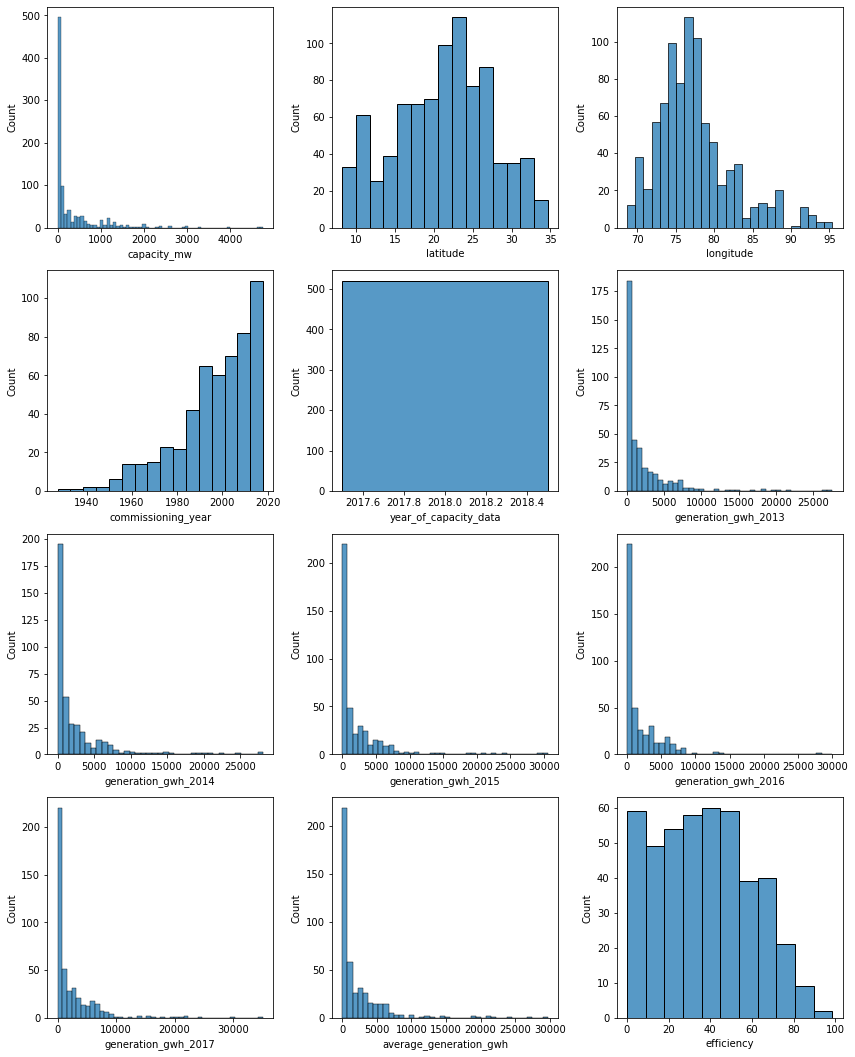

In [29]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(5,3,i+1)
    sns.histplot(x = numerical_features.iloc[:,i].dropna())
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

### Univariate analysis

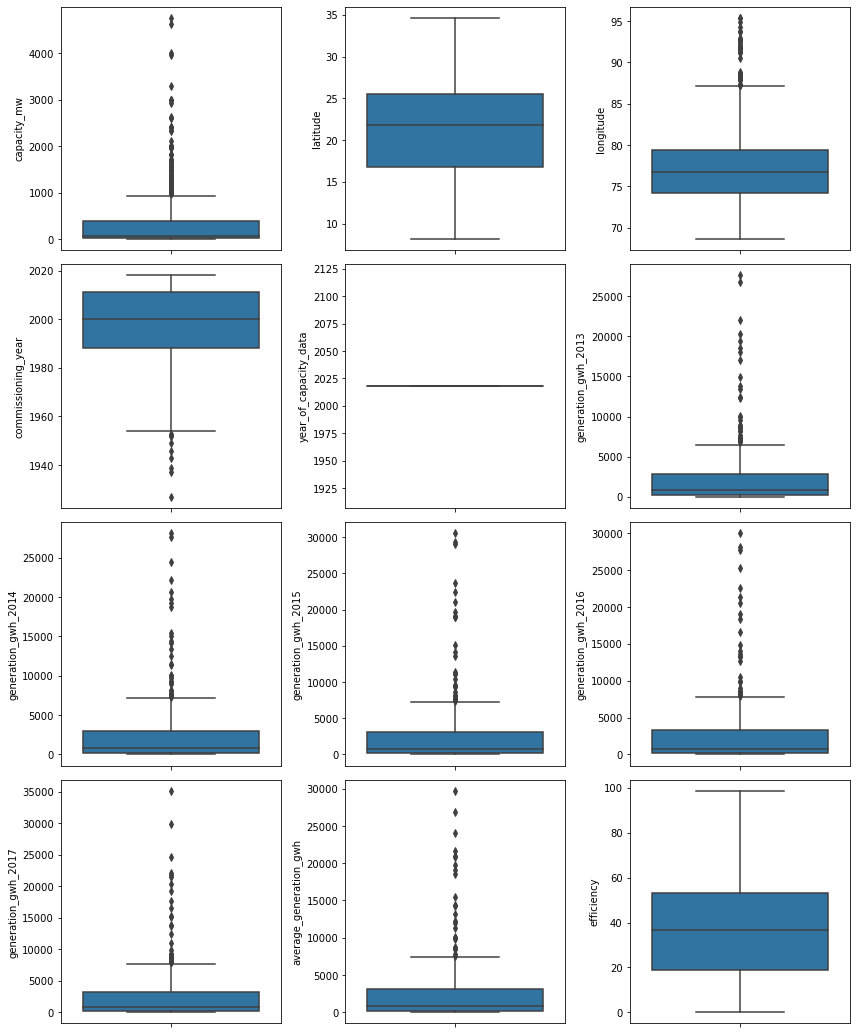

In [30]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(5,3,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

### Bivariate analysis

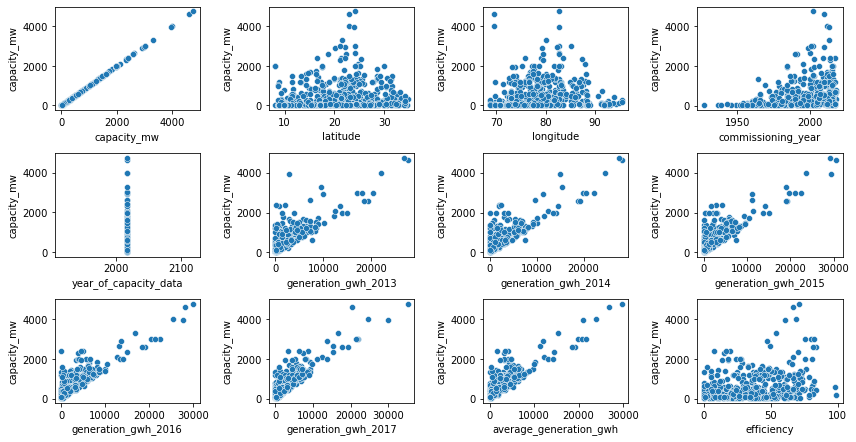

In [31]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(data = df, x= numerical_features.iloc[:, i],y=df['capacity_mw'])
plt.tight_layout()
plt.show()

#### Regression plot of varios variables in respect to the energy they produce

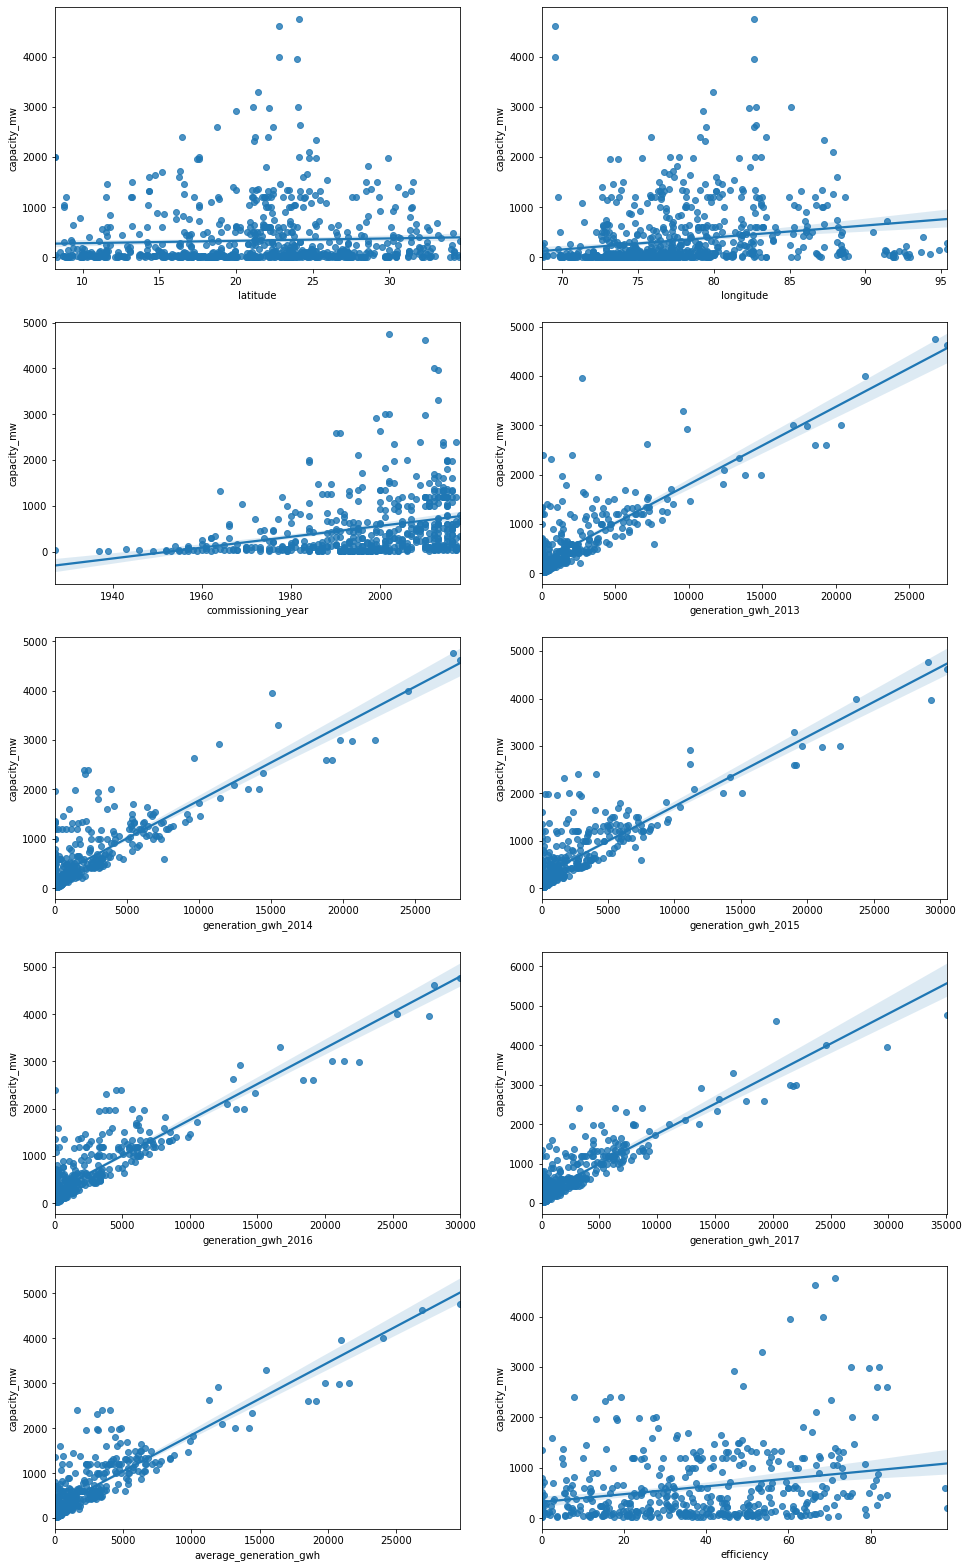

In [32]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(data = df, x = df['latitude'], y = df['capacity_mw'], ax=ax1)
_ = sns.regplot(data = df, x = df['longitude'], y = df['capacity_mw'], ax=ax2)
_ = sns.regplot(data = df, x = df['commissioning_year'], y = df['capacity_mw'], ax=ax3)
_ = sns.regplot(data = df, x = df['generation_gwh_2013'], y = df['capacity_mw'], ax=ax4)
_ = sns.regplot(data = df, x = df['generation_gwh_2014'], y = df['capacity_mw'], ax=ax5)
_ = sns.regplot(data = df, x = df['generation_gwh_2015'], y = df['capacity_mw'], ax=ax6)
_ = sns.regplot(data = df, x = df['generation_gwh_2016'], y = df['capacity_mw'], ax=ax7)
_ = sns.regplot(data = df, x = df['generation_gwh_2017'], y = df['capacity_mw'], ax=ax8)
_ = sns.regplot(data = df, x = df['average_generation_gwh'], y = df['capacity_mw'], ax=ax9)
_ = sns.regplot(data = df, x = df['efficiency'], y = df['capacity_mw'], ax=ax10)

We can observe that, the latitude and longitude have no influence on energey produces.
As year increases, do does the energy capacity.

<AxesSubplot:title={'center':'High Correlation'}>

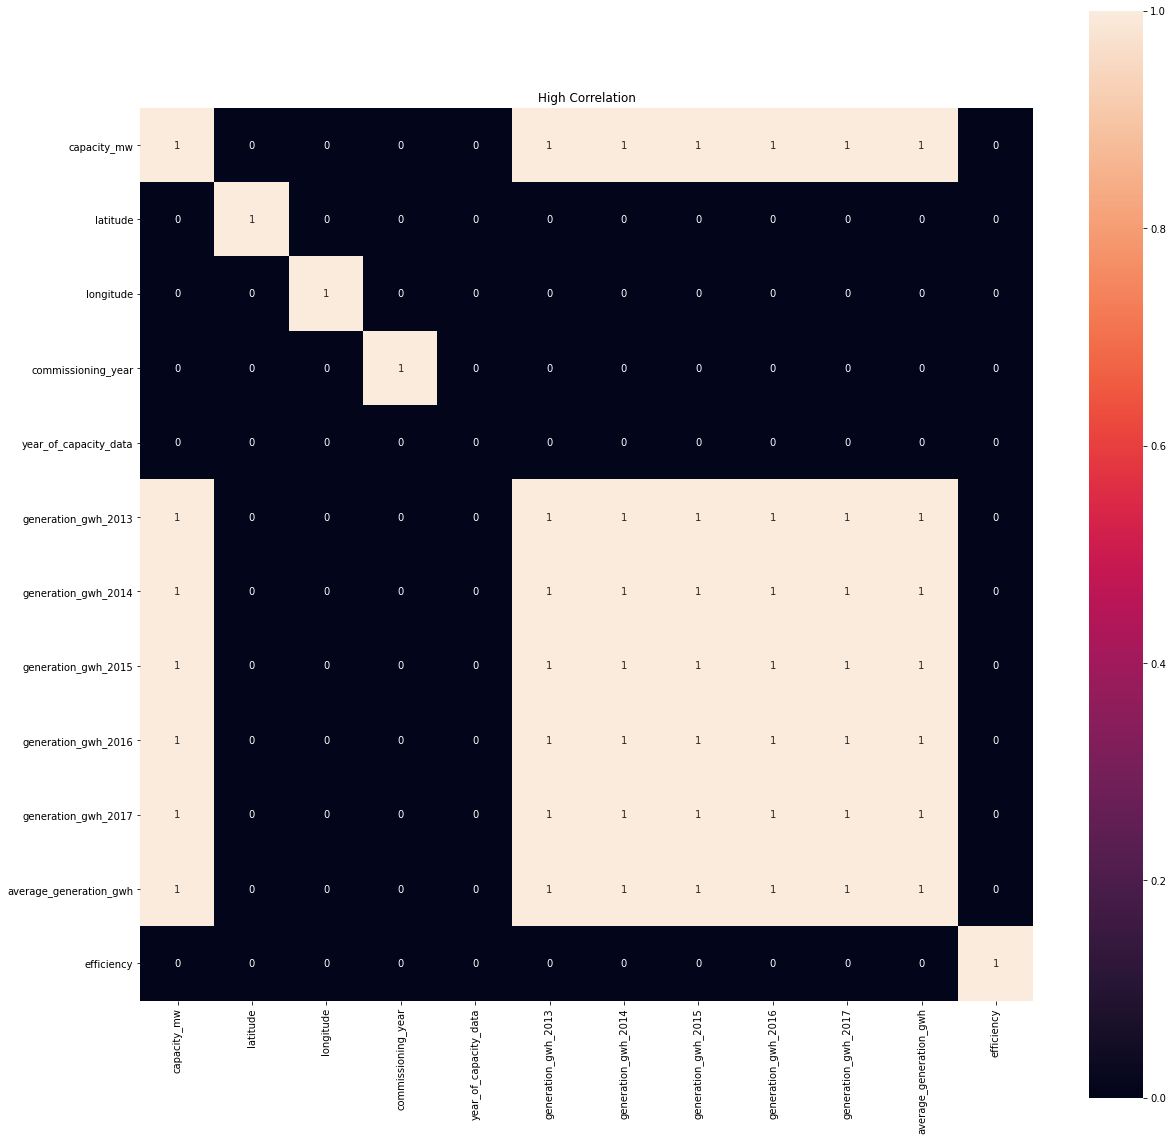

In [33]:
num_correlation = df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

In [34]:
corr = num_correlation.corr()
print(corr['capacity_mw'].sort_values(ascending=False))

capacity_mw               1.000000
generation_gwh_2017       0.965797
generation_gwh_2016       0.957738
average_generation_gwh    0.946292
generation_gwh_2015       0.945154
generation_gwh_2014       0.937628
generation_gwh_2013       0.928483
efficiency                0.283284
commissioning_year       -0.086267
longitude                -0.418390
latitude                 -0.601990
year_of_capacity_data          NaN
Name: capacity_mw, dtype: float64


In [35]:
df.drop(columns=['generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014','generation_gwh_2013'],axis=1,inplace=True) 

Dropping these coulmns as we have created the average coulmn already

In [36]:
df.isnull().mean().sort_values(ascending=False).head() # Checking which values are the most missing

other_fuel1               0.780837
owner                     0.623348
efficiency                0.504405
average_generation_gwh    0.504405
generation_data_source    0.504405
dtype: float64

In [37]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source,average_generation_gwh,efficiency
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2018.0,Central Electricity Authority,728.618624,61.611587
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2018.0,Central Electricity Authority,4449.757947,28.220180


In [38]:
cat_col = df.select_dtypes(include='object').columns
print(cat_col) # Categorical columns

Index(['name', 'primary_fuel', 'other_fuel1', 'owner', 'source',
       'geolocation_source', 'generation_data_source'],
      dtype='object')


In [39]:
home_cat_features = df.select_dtypes(include='object').isnull().mean()

cat_null_features = pd.DataFrame(data={'Missing Cat Home Percentage: ': home_cat_features[home_cat_features>0]*100})
cat_null_features.index.name = 'Categorical Features'
cat_null_features #Checking missing values in categorical columns

,Missing Cat Home Percentage:
Categorical Features,
other_fuel1,78.083700
owner,62.334802
geolocation_source,2.092511
generation_data_source,50.440529


In [40]:
for col in ('other_fuel1', 'owner', 'geolocation_source', 'generation_data_source'):
        df[col] = df[col].fillna('None') # Filling missing data with None

In [41]:
home_cat_features = df.select_dtypes(include='object').isnull().mean()

home_cat_features

name                      0.0
primary_fuel              0.0
other_fuel1               0.0
owner                     0.0
source                    0.0
geolocation_source        0.0
generation_data_source    0.0
dtype: float64

In [42]:
df.corr()['capacity_mw'].sort_values(ascending=False) # Checking co-relation with capacity

capacity_mw               1.000000
average_generation_gwh    0.877239
commissioning_year        0.294661
efficiency                0.247327
longitude                 0.198377
latitude                  0.050107
year_of_capacity_data          NaN
Name: capacity_mw, dtype: float64

In [43]:
df.isnull().sum().sort_values(ascending=False)

efficiency                458
average_generation_gwh    458
year_of_capacity_data     388
commissioning_year        380
longitude                  46
latitude                   46
generation_data_source      0
geolocation_source          0
source                      0
owner                       0
other_fuel1                 0
primary_fuel                0
capacity_mw                 0
name                        0
dtype: int64

from the graphs, we know  that latitued, longitude, have no influence on the capacity so I won't be using these in final test. 

Skew of Capacity (in MW): 3.1932573023446458


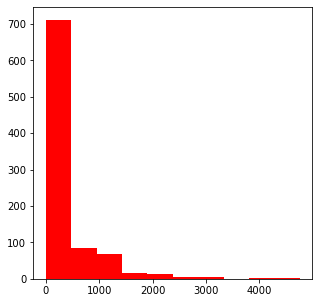

In [44]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Capacity (in MW):", df.capacity_mw.skew())
plt.hist(df.capacity_mw,  color='red')
plt.show() # Checking skew of target variable

Skew of Log-Transformed Capacity (in MW): 0.1250292534678711


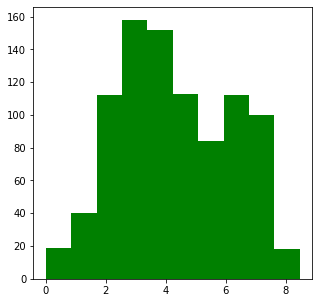

In [45]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Capacity (in MW):", np.log1p(df.capacity_mw).skew())
plt.hist(np.log1p(df.capacity_mw), color='green')
plt.show() # Fixing the skew by taking log

### Preparing data for training model

In [46]:
X = df.drop(['capacity_mw'], axis=1)
y = np.log1p(df['capacity_mw'])

In [47]:
dummy = pd.get_dummies(df['primary_fuel'])
dummy # Creating dummy variable for the primary fuel

,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
903,0,1,0,0,0,0,0,0
904,0,0,0,0,0,0,1,0
905,0,0,0,0,0,0,0,1
906,0,1,0,0,0,0,0,0


In [48]:
df = pd.concat([df,dummy],axis=1) # Merging the two data frames

In [49]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_data_source,average_generation_gwh,efficiency,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,None,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,None,NaN,NaN,0,0,0,0,0,0,1,0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,None,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,None,NaN,NaN,0,1,0,0,0,0,0,0
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,None,NaN,AES,CDM,WRI,NaN,None,NaN,NaN,0,0,0,0,0,0,0,1
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,None,2004.0,None,Central Electricity Authority,WRI,2018.0,Central Electricity Authority,728.618624,61.611587,0,0,1,0,0,0,0,0
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,None,Central Electricity Authority,WRI,2018.0,Central Electricity Authority,4449.757947,28.220180,0,1,0,0,0,0,0,0


In [50]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'year_of_capacity_data', 'generation_data_source',
       'average_generation_gwh', 'efficiency', 'Biomass', 'Coal', 'Gas',
       'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind'],
      dtype='object')

In [51]:
df = df.dropna(axis=0) # Removing rows which contain NaN values

### Selection of best model

In [52]:
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import sklearn.metrics as sm

# Importing required libraries

In [53]:
X=df[['commissioning_year', 'average_generation_gwh', 'efficiency', 'Biomass', 'Coal', 'Gas',
       'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind']] # These are the coulms which I will be using
y=df.capacity_mw 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (350, 11)
Y Train Shape  (350,)
X Test Shape  (88, 11)
Y Test Shape  (88,)


### Decision tree regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.875209188114578

In [55]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.8861120187225827


In [56]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 103.94
Mean squared error = 49468.18
Median absolute error = 26.17
Explain variance score = 0.88
R2 score = 0.88


### Random forest regression


In [57]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9436900678865766

In [58]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.9269660062981422


In [59]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 59.94
Mean squared error = 22321.76
Median absolute error = 19.3
Explain variance score = 0.94
R2 score = 0.94


### Support vector regression

In [60]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.034670069667720904

In [61]:
scr = cross_val_score(svr, X,y, cv=4)
print(scr.mean())

-0.02077640070421541


In [62]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_svr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_svr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_svr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_svr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_svr), 2))

Mean absolute error = 363.41
Mean squared error = 382665.34
Median absolute error = 273.44
Explain variance score = 0.06
R2 score = 0.03


### Lasso regression

In [63]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
y_pred_lasso = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)

0.8448082467051579

In [64]:
scr = cross_val_score(lassoReg, X,y, cv=4)
print(scr.mean())

0.8361168819444341


In [65]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lasso), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lasso), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lasso), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lasso), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lasso), 2))

Mean absolute error = 181.21
Mean squared error = 61519.39
Median absolute error = 129.12
Explain variance score = 0.85
R2 score = 0.84


### Linear regression

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True).fit(X, y)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.8480489379285993

In [67]:
cr = cross_val_score(lr, X,y, cv=4)
print(scr.mean())

0.8361168819444341


In [68]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lr), 2))

Mean absolute error = 178.39
Mean squared error = 60234.75
Median absolute error = 130.18
Explain variance score = 0.85
R2 score = 0.85


### Best model: Random forest regression

In [69]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 59.94
Mean squared error = 22321.76
Median absolute error = 19.3
Explain variance score = 0.94
R2 score = 0.94


PCA decreased model accuracy so I have decided to delete that part.

### Hyper paramter tuning


In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [72]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [73]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [74]:
GCV.best_params_

{'criterion': 'mae',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [75]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mae')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9446619936579422

Achieved 94.4% accuracy

### Saving the model

In [76]:
import joblib
joblib.dump(mod,"PowerPlant.pkl")

['PowerPlant.pkl']

### Now making a model to predict the fuel type

In [77]:
X=df[['commissioning_year', 'average_generation_gwh', 'efficiency','capacity_mw']] #feature columns
y=df.primary_fuel #predictor variable

In [78]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

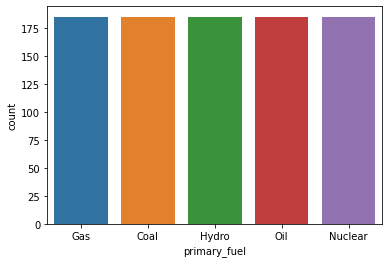

In [79]:
sns.countplot(x=yo)

In [80]:

X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (740, 4)
Y Train Shape  (740,)
X Test Shape  (185, 4)
Y Test Shape  (185,)


In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn import metrics
    print("%s -> Accuracy: %%% .2f" % (name,metrics.accuracy_score(y_test, y_pred)*100))

Logistic Regression -> Accuracy: % 61.62
Naive Bayes -> Accuracy: % 64.32
Decision Tree (CART) -> Accuracy: % 75.14
K-NN -> Accuracy: % 64.86
AdaBoostClassifier -> Accuracy: % 25.95
BaggingClassifier -> Accuracy: % 81.08
RandomForestClassifier -> Accuracy: % 81.08


In [82]:
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (740, 4)
Y Train Shape  (740,)
X Test Shape  (185, 4)
Y Test Shape  (185,)


In [83]:
bc = BaggingClassifier(random_state=1)
bc.fit(X_train, y_train)
y_pred_bc = bc.predict(X_test)
bc.score(X_test, y_test)

0.8162162162162162

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bc))

              precision    recall  f1-score   support

        Coal       0.66      0.64      0.65        33
         Gas       0.69      0.76      0.72        29
       Hydro       0.81      0.69      0.75        36
     Nuclear       0.86      0.90      0.88        40
         Oil       0.98      1.00      0.99        47

    accuracy                           0.82       185
   macro avg       0.80      0.80      0.80       185
weighted avg       0.82      0.82      0.81       185



Achieved 81% accuracy

### Saving the model

In [85]:
import joblib
joblib.dump(bc,"PowerPlant_fuel.pkl")

['PowerPlant_fuel.pkl']